# Lab 2 - Clustering

The data set contains 4 values: Sepal Length, Sepal Width, Petal Length, Petal Width.  
The labels contains a numpy array of 0-2. This denotes 3 different species- Iris setosa, Iris versicolor and Iris virginica.  
There is a set of 150 records.

(150, 4)


Text(0.5, 0, 'Sepal Length')

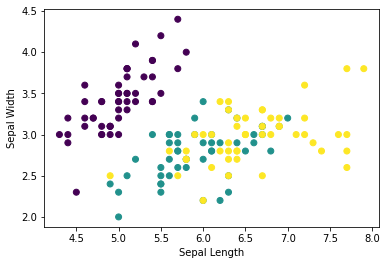

In [12]:
import numpy as np
data = np.load('Iris_data.npy')
labels = np.load('./Iris_labels.npy')

print(data.shape)

import matplotlib.pyplot as plt
X = data[:,0]
Y = data[:,1]

plt.scatter(X, Y, c = labels)
plt.ylabel('Sepal Width')
plt.xlabel('Sepal Length')

## Task 2.2 - K-means Clustering 
I first show the normal graph and then performed clustering with 3 clusters to show the difference. Finally, I performed the sum of squared error, and using the elbow method I found the ideal number of clusters to use for the data set is 3.

original labels
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

kmeans labels with 3 clusters
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]



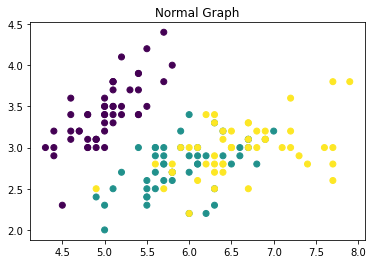

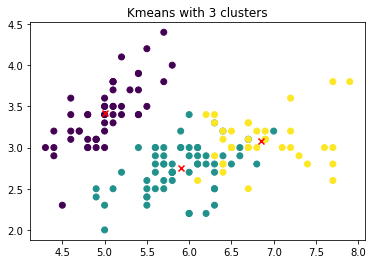

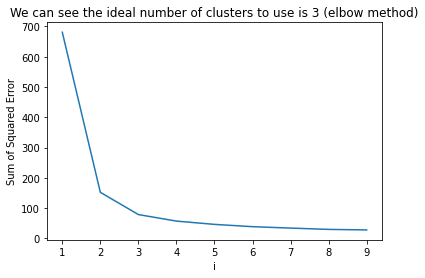

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans

data = np.load('Iris_data.npy')
labels = np.load('./Iris_labels.npy')

X = data[:,0]
Y = data[:,1]

print("original labels")
print(labels)
print()


n = 3
km = KMeans(n_clusters= n)
kmModel = km.fit(data)
print("kmeans labels with " + str(n) + " clusters")
print(kmModel.predict(data))
kmModel.cluster_centers_
print()

plt.scatter(X, Y, c = labels)
plt.title('Normal Graph')
plt.show()
print()

plt.scatter(X, Y, c = km.predict(data))
plt.scatter(kmModel.cluster_centers_[:,0], kmModel.cluster_centers_[:,1], color = 'red', marker = 'x')
plt.title('Kmeans with ' + str(n) + ' clusters')
plt.show()
print()

kRange = range(1, 10)
sse = []
for i in kRange:
    km = KMeans(n_clusters = i)
    km.fit(data)
    sse.append(km.inertia_)
    
sse
plt.title('We can see the ideal number of clusters to use is 3 (elbow method)')
plt.xlabel('i')
plt.ylabel('Sum of Squared Error')
plt.plot(kRange, sse)
plt.show()

## Task 2.3 - Gaussian Mixture Models
Changing the value in the probability table, we can see the ideal number of clusters to use is 3

original labels
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

new labels
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

Means
[[5.91697517 2.77803998 4.20523542 1.29841561]
 [5.006      3.418      1.464      0.244     ]
 [6.54632887 2.94943079 5.4834877  1.98716063]]


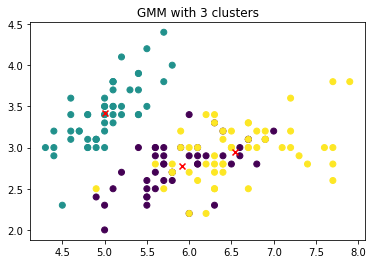


Probabilities
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


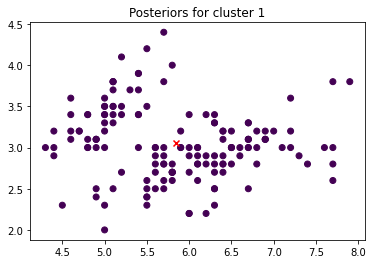

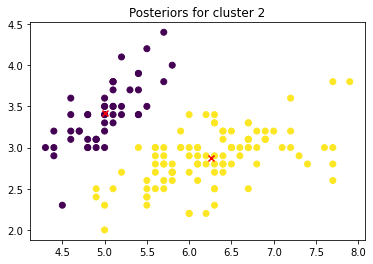

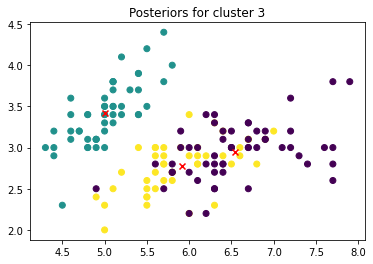

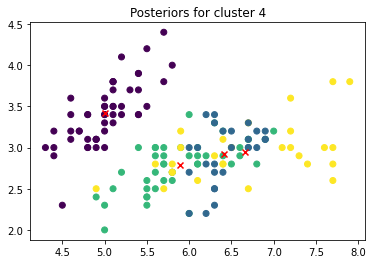

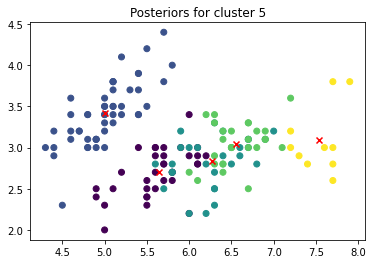

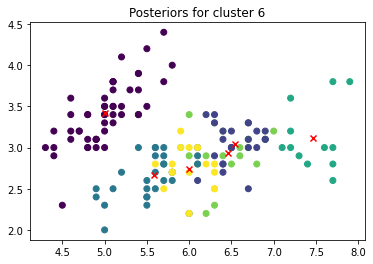

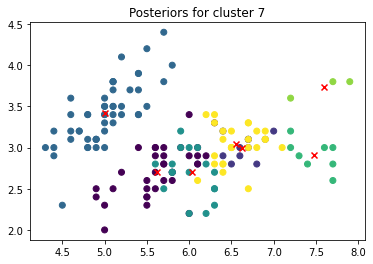

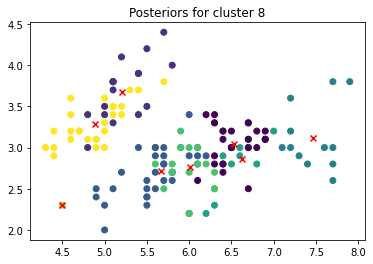

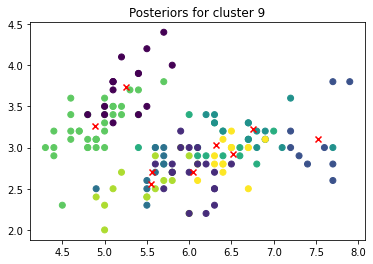

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import mixture

data = np.load('Iris_data.npy')
labels = np.load('./Iris_labels.npy')

X = data[:,0]
Y = data[:,1]

print("original labels")
print(labels)
print()

print("new labels")
print(newLabels)
print()

clusters = 3
gmm = mixture.GaussianMixture(n_components= clusters, covariance_type='full').fit(data)
newLabels = gmm.predict(data)

weights = gmm.weights_
means = gmm.means_
covars = gmm.covariances_

print("Means")
print(means)



plt.scatter(X, Y, c = newLabels)
plt.scatter(means[:,0], means[:,1], color = 'red', marker = 'x')
plt.title('GMM with ' + str(clusters) + ' clusters')
plt.show()
print()

print("Probabilities")
probs = gmm.predict_proba(data)
print(probs[:10].round(3))

for i in range(1,10):
    newG = mixture.GaussianMixture(n_components= i, covariance_type='full').fit(data)
    plt.scatter(X, Y, c= newG.predict(data))
    plt.scatter(newG.means_[:,0], newG.means_[:,1], color = 'red', marker='x')
    plt.title(f'Posteriors for cluster {i}')
    plt.show()
